In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel("USStates.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             50 non-null     object 
 1   Region            50 non-null     object 
 2   Population        50 non-null     float64
 3   HouseholdIncome   50 non-null     float64
 4   HighSchool        50 non-null     float64
 5   College           50 non-null     float64
 6   Smokers           50 non-null     float64
 7   PhysicalActivity  50 non-null     float64
 8   Obese             50 non-null     float64
 9   NonWhite          50 non-null     float64
 10  HeavyDrinkers     50 non-null     float64
 11  TwoParents        50 non-null     float64
 12  Insured           50 non-null     float64
dtypes: float64(11), object(2)
memory usage: 5.2+ KB


# Task 1

## Technically, all variables below with the exception of the State could be considered both explanatory and response variables with some being more viable than others.

| Column | Considered Explanatory | Considered Response | Note |
| --- | --- | --- |  --- | 
State | --- | ---| <small>This would be considered an identification variable.</small> | 
Region | X | X |<small>This could be both a target variable & an explanatory variable.</small>| 
Population | X | X |<small>This could be both a target variable & an explanatory variable.</small>| 
HouseholdIncome | X | X |<small>This could be both a target variable & an explanatory variable.</small>| 
HighSchool | X | X |<small>This could be both a target variable & an explanatory variable.</small>| 
College | X | X |<small>This could be both a target variable & an explanatory variable.</small>| 
Smokers | X | X |<small>This could be both a target variable & an explanatory variable.</small>| 
PhysicalActivity | X | X |<small>This could be both a target variable & an explanatory variable.</small>| 
Obese | X | X |<small>This could be both a target variable & an explanatory variable.</small>| 
NonWhite | X | X |<small>This could be both a target variable & an explanatory variable.</small>| 
HeavyDrinkers | X | X |<small>This could be both a target variable & an explanatory variable.</small>| 
TwoParents | X | X |<small>This could be both a target variable & an explanatory variable.</small>| 
Insured | X | X |<small>This could be both a target variable & an explanatory variable.</small>| 

# Task 2

## The population of interest in this dataset would be residents of the 50 states represented, assuming these data points are representative of the state as a whole. If the dataset is a representative sample, it is reasonable to generalize the findings to the larger population in each of these states. Given that each data point is labeled with 'State', the population of interest is likely the entire U.S. population as subdivided by state. It's essential to remember that this dataset might not perfectly capture the entire population of each state or the U.S., but it is being used to make generalized assumptions about those populations.

# Task 3

In [11]:
summary = df.describe(include='all')
summary = summary.loc[['count', 'mean', 'std']]
pd.DataFrame(summary.T)

,count,mean,std
State,50,NaN,NaN
Region,50,NaN,NaN
Population,50.0,6.36394,7.15096
HouseholdIncome,50.0,53.28428,8.690234
HighSchool,50.0,89.32,3.107135
College,50.0,30.83,6.078643
Smokers,50.0,19.316,3.523122
PhysicalActivity,50.0,50.734,5.509643
Obese,50.0,28.766,3.369286
NonWhite,50.0,22.156,12.685572


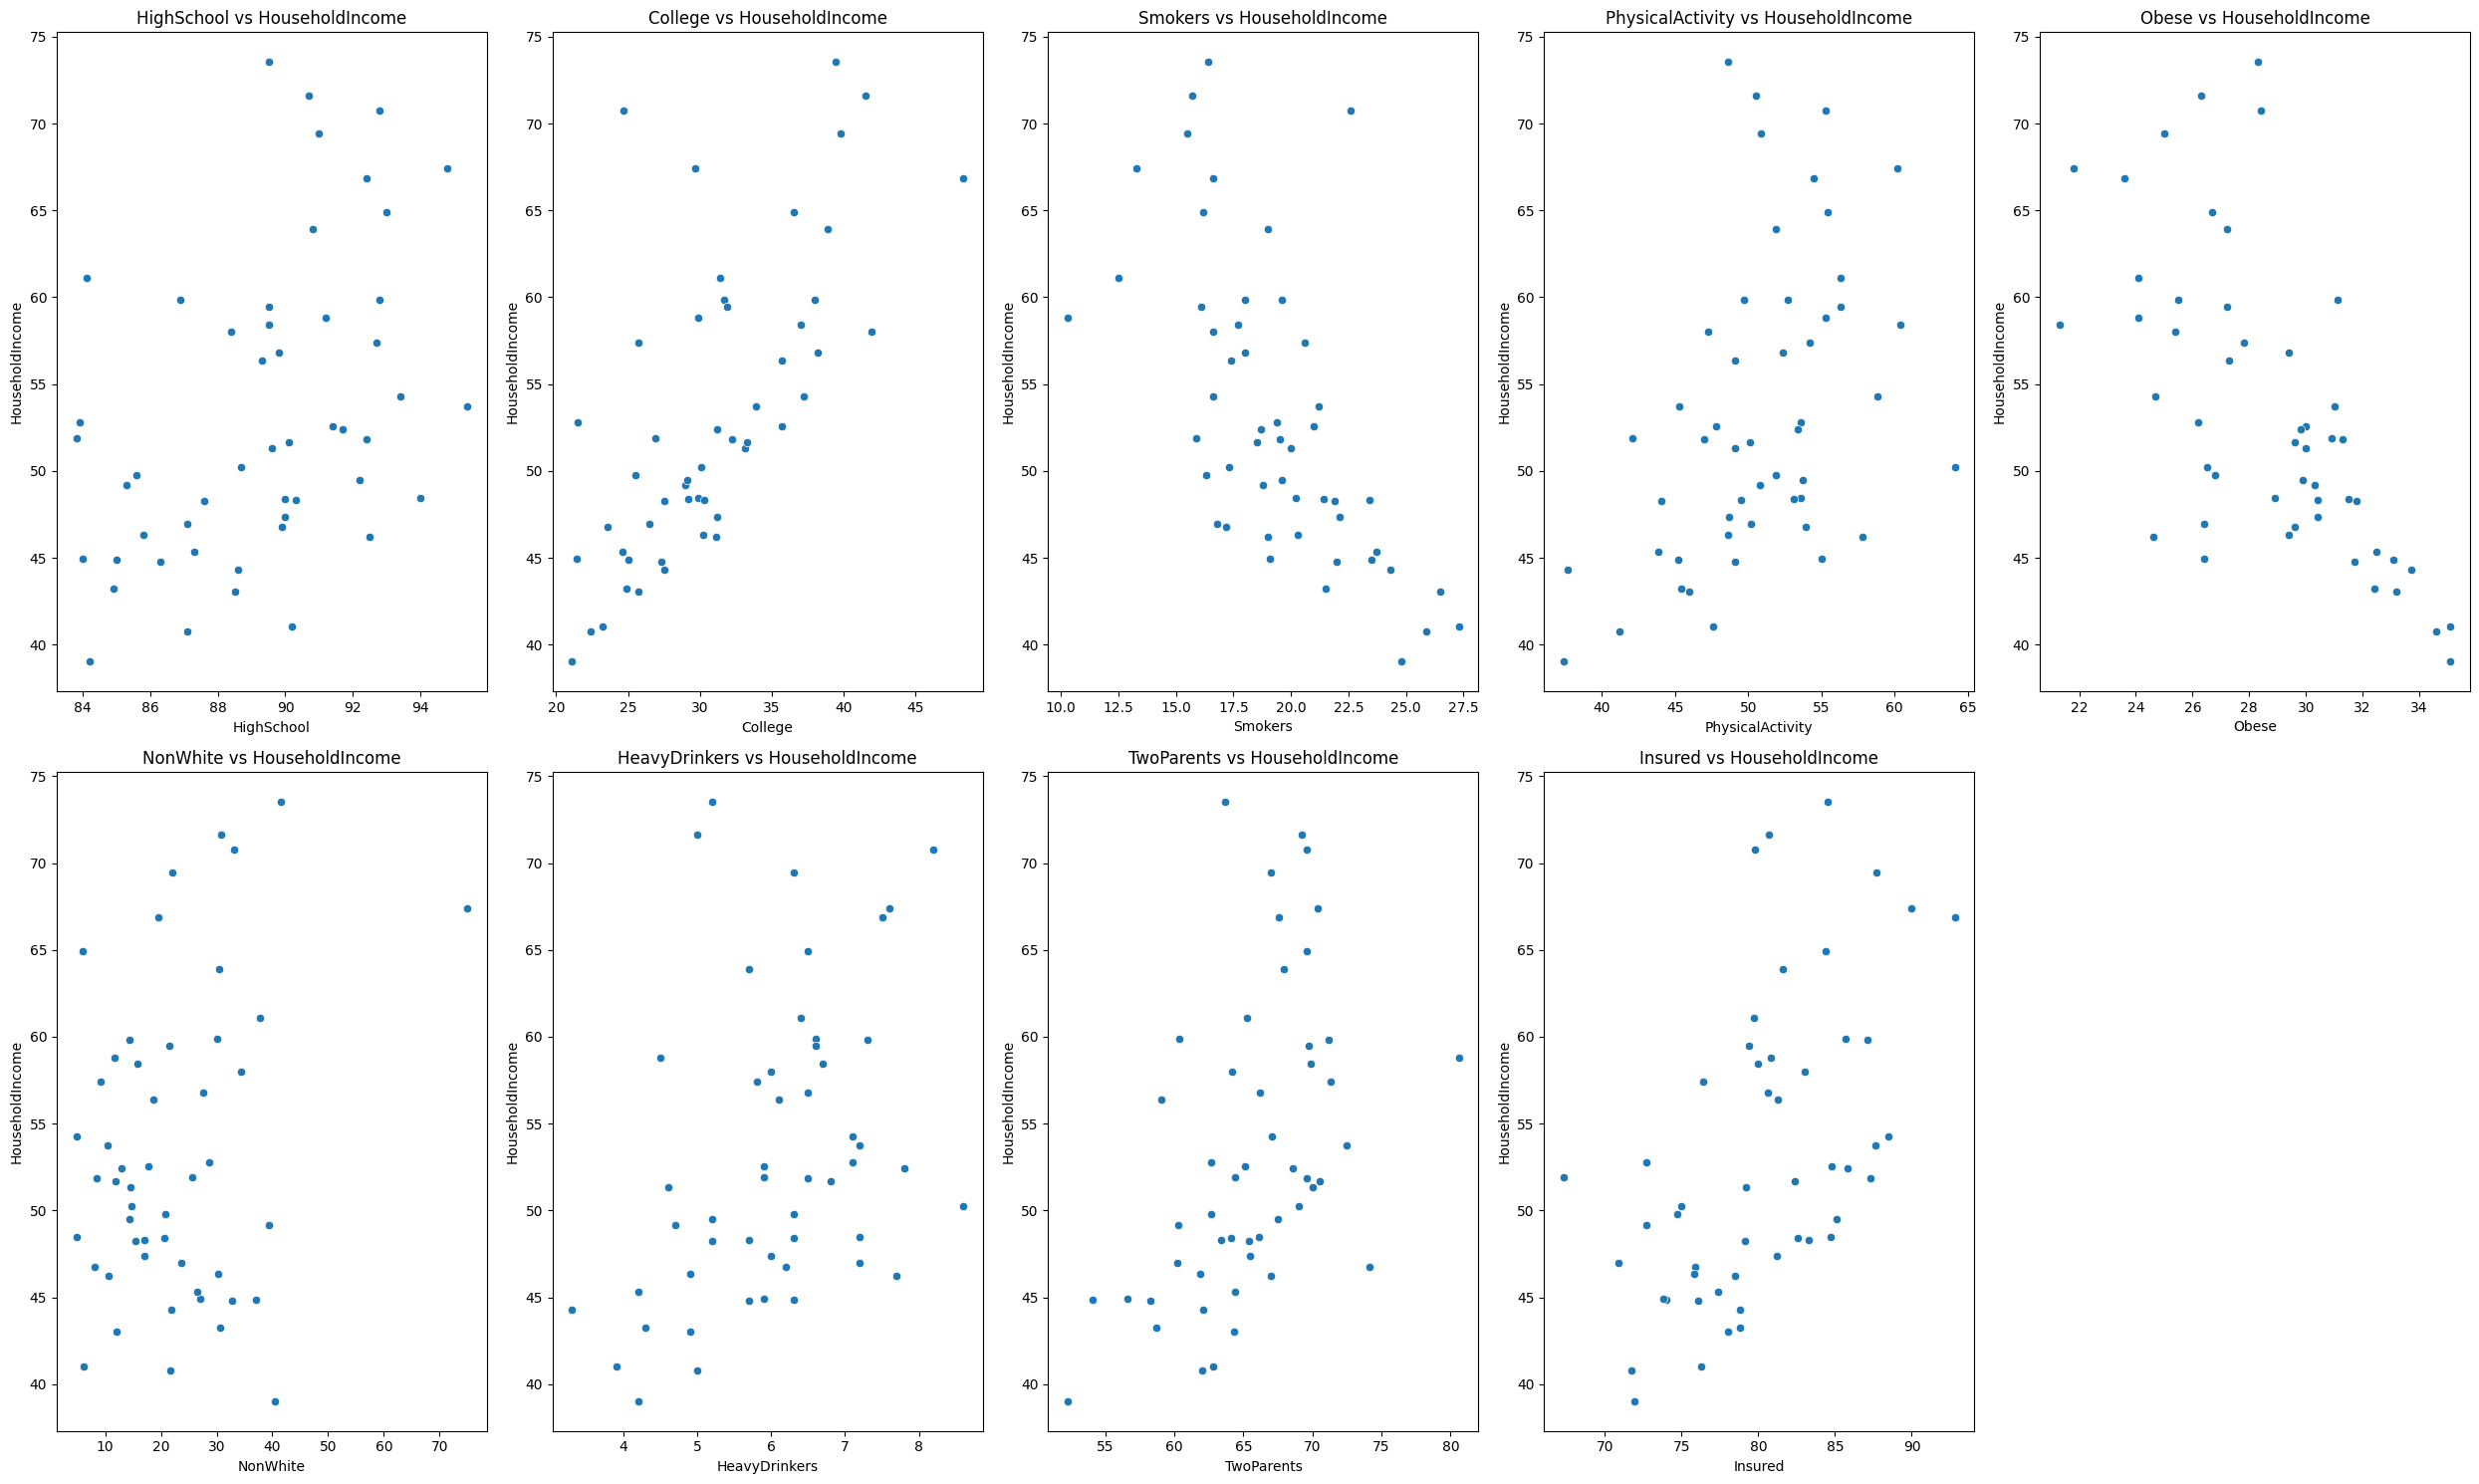

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


explanatory_vars = ['HighSchool', 'College', 'Smokers', 'PhysicalActivity', 
                    'Obese', 'NonWhite', 'HeavyDrinkers', 'TwoParents', 'Insured']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 15))

for i, var in enumerate(explanatory_vars):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    sns.scatterplot(x=df[var], y=df['HouseholdIncome'], ax=ax)
    ax.set_title(f'{var} vs HouseholdIncome')
    ax.set_xlabel(var)
    ax.set_ylabel('HouseholdIncome')

if len(explanatory_vars) < 10:
    for i in range(len(explanatory_vars), 10):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()


# Task 4

In [13]:
correlation = df[explanatory_vars+['HouseholdIncome']].corr()['HouseholdIncome'].drop('HouseholdIncome')
print(correlation)

HighSchool          0.430845
College             0.685591
Smokers            -0.637522
PhysicalActivity    0.440417
Obese              -0.649112
NonWhite            0.252942
HeavyDrinkers       0.373014
TwoParents          0.477644
Insured             0.549679
Name: HouseholdIncome, dtype: float64


Regression model for HighSchool:
-------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     10.94
Date:                Mon, 10 Jul 2023   Prob (F-statistic):            0.00179
Time:                        15:24:42   Log-Likelihood:                -173.42
No. Observations:                  50   AIC:                             350.8
Df Residuals:                      48   BIC:                             354.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

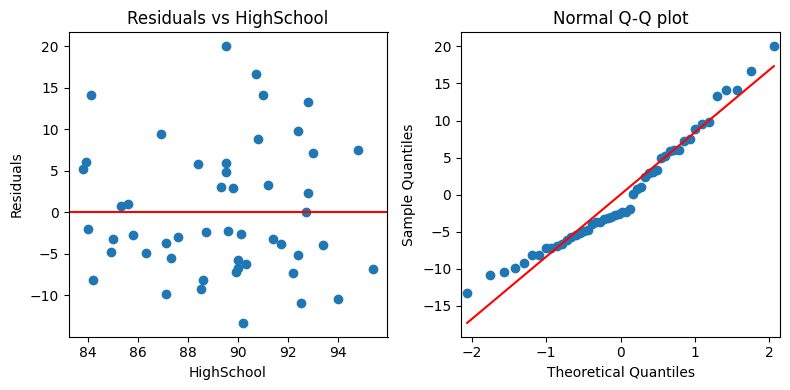




###############################################################################
###############################################################################
###############################################################################



Regression model for College:
-------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     42.57
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           3.94e-08
Time:                        15:24:42   Log-Likelihood:                -162.68
No. Observations:                  50   AIC:                             329.4
Df Residuals:                      48   BIC:                             333.2
Df Model:  

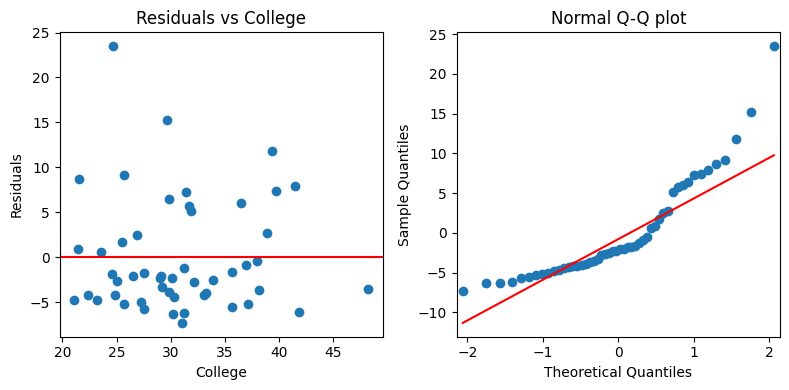




###############################################################################
###############################################################################
###############################################################################



Regression model for Smokers:
-------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     32.87
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           6.40e-07
Time:                        15:24:42   Log-Likelihood:                -165.51
No. Observations:                  50   AIC:                             335.0
Df Residuals:                      48   BIC:                             338.8
Df Model:  

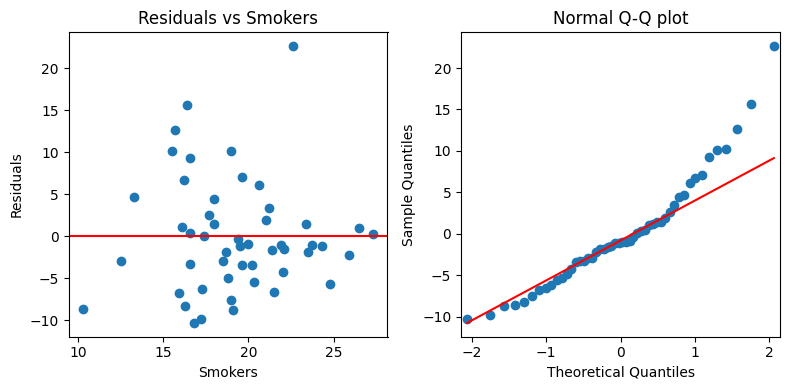




###############################################################################
###############################################################################
###############################################################################



Regression model for PhysicalActivity:
-------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     11.55
Date:                Mon, 10 Jul 2023   Prob (F-statistic):            0.00137
Time:                        15:24:42   Log-Likelihood:                -173.16
No. Observations:                  50   AIC:                             350.3
Df Residuals:                      48   BIC:                             354.1
Df

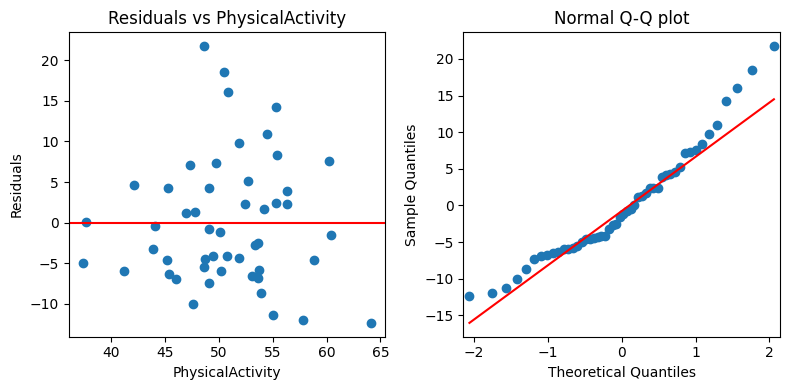




###############################################################################
###############################################################################
###############################################################################



Regression model for Obese:
-------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     34.95
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           3.42e-07
Time:                        15:24:42   Log-Likelihood:                -164.88
No. Observations:                  50   AIC:                             333.8
Df Residuals:                      48   BIC:                             337.6
Df Model:    

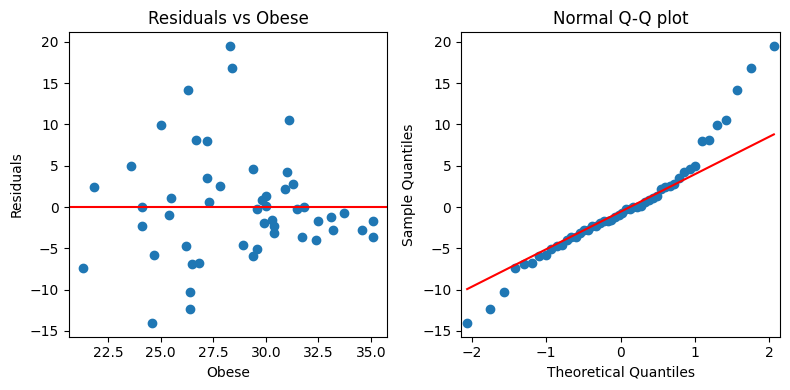




###############################################################################
###############################################################################
###############################################################################



Regression model for NonWhite:
-------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3.281
Date:                Mon, 10 Jul 2023   Prob (F-statistic):             0.0763
Time:                        15:24:42   Log-Likelihood:                -176.90
No. Observations:                  50   AIC:                             357.8
Df Residuals:                      48   BIC:                             361.6
Df Model: 

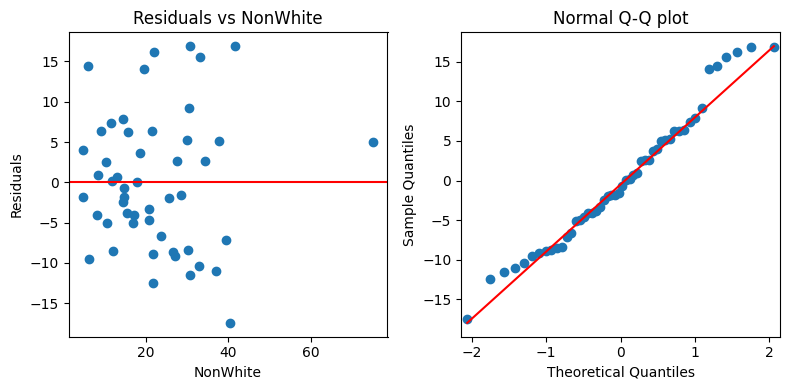




###############################################################################
###############################################################################
###############################################################################



Regression model for HeavyDrinkers:
-------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     7.758
Date:                Mon, 10 Jul 2023   Prob (F-statistic):            0.00763
Time:                        15:24:42   Log-Likelihood:                -174.81
No. Observations:                  50   AIC:                             353.6
Df Residuals:                      48   BIC:                             357.4
Df Mo

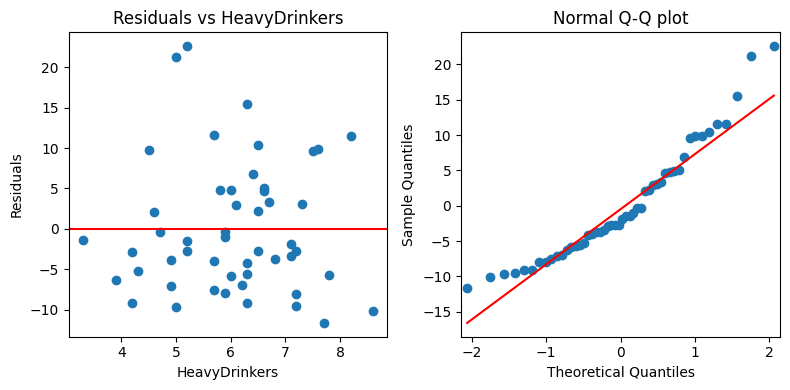




###############################################################################
###############################################################################
###############################################################################



Regression model for TwoParents:
-------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     14.19
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           0.000452
Time:                        15:24:43   Log-Likelihood:                -172.08
No. Observations:                  50   AIC:                             348.2
Df Residuals:                      48   BIC:                             352.0
Df Model

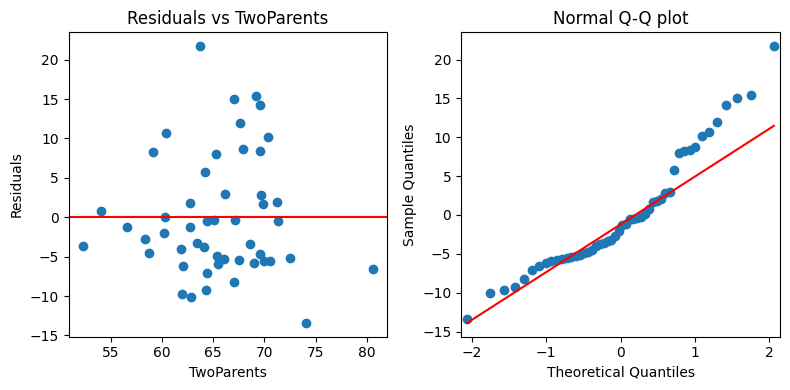




###############################################################################
###############################################################################
###############################################################################



Regression model for Insured:
-------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     20.78
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           3.56e-05
Time:                        15:24:43   Log-Likelihood:                -169.56
No. Observations:                  50   AIC:                             343.1
Df Residuals:                      48   BIC:                             346.9
Df Model:  

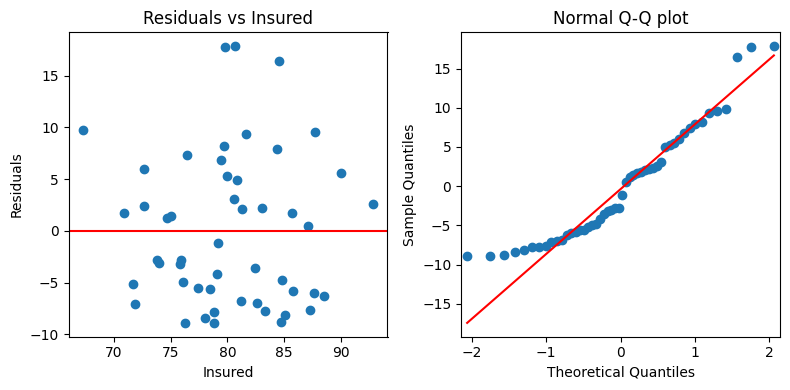




###############################################################################
###############################################################################
###############################################################################





In [14]:
for var in explanatory_vars:
    model = sm.OLS(df['HouseholdIncome'], sm.add_constant(df[var])).fit()

    print(f"Regression model for {var}:")
    print('-------------------------------------------------------------------------------')
    print('')
    print(model.summary())

    # Residuals vs Fitted values
    plt.figure(figsize=(8,4))
    plt.subplot(121)
    plt.scatter(df[var], model.resid)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel(var)
    plt.ylabel('Residuals')
    plt.title(f"Residuals vs {var}")

    # Normal Q-Q plot
    plt.subplot(122)
    sm.qqplot(model.resid, line ='q', ax=plt.gca())
    plt.title(Normal Q-Q plot)
    
    plt.tight_layout()
    plt.show()
    print('\n\n')
    print('###############################################################################')
    print('###############################################################################')
    print('###############################################################################')
    print('\n\n')


## Note on simple linear regression: The value of the modelling method would depend on the following factors:




### Linearity: 
The assumption of linearity is that the relationship between the independent and dependent variables should ideally be represented by a straight line. If the scatter plots we created during step 3 indicate a straight-line trend between these variables, then this requirement is met.

### Normality: 
Another assumption we make is that the residuals follow a normal distribution. We can verify this using the Omnibus test, where a p-value of less than 0.05 points to non-normality. Here, the Omnibus test p-values for the 'Obese', 'HeavyDrinkers', and 'TwoParents' models are all under 0.05, suggesting possible breaches of the normal curve assumption.

### Homoscedasticity: 
Homoscedasticity suggests that the variance of the residuals should remain constant at all levels of the independent variables. If our scatter plots from step 3 are showing a funnel shape, it might imply that we've strayed from this principle.

### Significant R-squared values: 
The R-squared value tells us how much of the variance in the dependent variable is explained by the independent one. For example above, Obese and Insured have higher R-squared values (0.421 and 0.302), showing that they could be strong predictors of HouseholdIncome. For most other variables though, the R-squared values are quite low, meaning that simple linear regression might not be the most effective approach.

### Lack of multicollinearity: 
With these simple linear regression models, this isn't a problem because we are using a single input variable.

# Task 5

In [15]:
import statsmodels.formula.api as smf

model1 = smf.ols(formula='HouseholdIncome ~ College', data=df)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     42.57
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           3.94e-08
Time:                        15:24:43   Log-Likelihood:                -162.68
No. Observations:                  50   AIC:                             329.4
Df Residuals:                      48   BIC:                             333.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.0664      4.719      4.888      0.0

## Analysis of College Variable
The College Education variable is likely highly correlated to earnings because it's widely known that education often plays a significant role in income levels. People with higher degrees, like a college diploma, usually earn more, leading to a higher total household income.
The prediction equation for Model 1 would be:

$$ HouseholdIncome = 23.0664 + 0.9801 * College $$

Here's how to interpret the coefficients:

### Constant (Intercept):
This value is the estimated average income for households where the College factor is zero, meaning no college education. So, if we're talking about someone who hasn't been to college, their expected average household income would be roughly $23,066.4.

### College = 0.9801:
This number is the slope of the line and represents the expected change in household income for each unit increase in 'College'. So, whether that means one additional year of college education or making the jump from no degree to having one (depending on how we define 'College'), we can expect to see an approximate $980.1 increase in household income, all other things being equal.

### The R-squared statistic for Model 1 is 0.470:
This metric tells us what proportion of the variance in household income can be predicted from the 'College' factor. This means that about 47% of the changes in income are explained by someone's education level. That is a moderate R-squared value, and while higher values might sound better, they can also mean the model is overfitting the data.

### As for why we might start with the College variable as an explanatory variable, it might be due to an initial hypothesis that education, and in particular college education, has a strong impact on household income. It's a reasonable first variable to consider given common knowledge and previous research showing that education level is often correlated with income. However, it's always necessary to conduct the actual analysis to confirm whether the data supports this hypothesis in any specific instance.

# Task 6

In [16]:
anova_table = sm.stats.anova_lm(results1, typ=2)
print(anova_table)

               sum_sq    df          F        PR(>F)
College   1739.358780   1.0  42.572008  3.941054e-08
Residual  1961.129512  48.0        NaN           NaN


## From the OLS Regression results and the ANOVA table, we can construct our hypotheses and interpretations as follows:

### For the parameter associated with the 'College' explanatory variable:

   Null Hypothesis (H0): The coefficient of the College variable (Beta_College) equals 0.<br>
   Alternative Hypothesis (H1): The coefficient of the College variable (Beta_College) is not equal to 0.<br>
   The T-test result for this hypothesis (t=6.525, P>|t|=0.000) means that we can reject the null hypothesis. So the College variable has a significant effect on the HouseholdIncome.

### For the Intercept parameter:

   Null Hypothesis (H0): The Intercept (Beta_Intercept) is equal to 0.<br>
   Alternative Hypothesis (H1): The Intercept (Beta_Intercept) is not equal to 0.<br>
   The T-test result for this hypothesis (t=4.888, P>|t|=0.000) also provides strong evidence to reject the null hypothesis in favor of the alternative. This implies that even when the 'College' variable is equal to zero, the 'HouseholdIncome' is not zero.

### From the ANOVA table:
   The F statistic value is 42.57 with a p-value (PR(>F)) of 3.94e-08 which is close to zero. This means that we reject the null hypothesis.

### In summary, both the 'Intercept' and 'College' parameters are statistically significant predictors of 'HouseholdIncome' and the overall model is significant in predicting the 'HouseholdIncome'.

# Task 7

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
coefficients <- read.csv(coefficients.csv)
df <- read.csv("USStates.csv")
model1 <- lm(HouseholdIncome ~ College, data = df)
summary(model1)


Call:
lm(formula = HouseholdIncome ~ College, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-7.319 -4.245 -2.203  2.652 23.484 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.0664     4.7187   4.888 1.18e-05 ***
College       0.9801     0.1502   6.525 3.94e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.392 on 48 degrees of freedom
Multiple R-squared:   0.47,	Adjusted R-squared:  0.459 
F-statistic: 42.57 on 1 and 48 DF,  p-value: 3.941e-08


In [3]:
prediction <- predict(model1, df)
residuals <- df$HouseholdIncome - prediction
sse <- sum(residuals^2)
mean_Y <- mean(df$HouseholdIncome)
deviations_Y <- df$HouseholdIncome - mean_Y
sst <- sum((df$HouseholdIncome - mean_Y)^2)
ssr <- sum((prediction - mean_Y)^2)
r_squared <- ssr / sst
cat("Sum of squared residuals (SSE):", sse, "\n")
cat("Sum of squares total (SST):", sst, "\n")
cat("Sum of squares due to regression (SSR):", ssr, "\n")
cat("R-squared:", r_squared, "\n")

Sum of squared residuals (SSE): 1961.13 
Sum of squares total (SST): 3700.488 
Sum of squares due to regression (SSR): 1739.359 
R-squared: 0.4700349 


## Upon comparing the results obtained from the code with the output provided, we can see that the computed statistics match:

### Sum of squared residuals (SSE): 1961.13
### Sum of squares total (SST): 3700.488
### Sum of squares due to regression (SSR): 1739.359
### R-squared: 0.4700349
## These values align with the ANOVA table and R-squared values reported in the regression output.

## The ANOVA table shows the F-statistic. The F-statistic tests the null hypothesis that for all regression coefficients, at least one of them is non-zero. In this case, the F-statistic is 42.57, with a very low p-value (3.94e-08), indicating strong evidence against the null hypothesis.

## The R-squared value of 0.4700349 represents the proportion of the total variation in the response variable (HouseholdIncome) that is explained by the regression model. It indicates that approximately 47 % of the variability in HouseholdIncome can be accounted for by the College variable in the model.

## The computed statistics match the ANOVA table and R-squared value reported in the regression output, confirming the accuracy of the computations. Any minor differences can be attributed to rounding errors or slight variations in the implementation of the statistical functions across software packages. Overall, the similarity between the computed values and the regression output demonstrates the consistency and validity of the analysis.

# Task 8

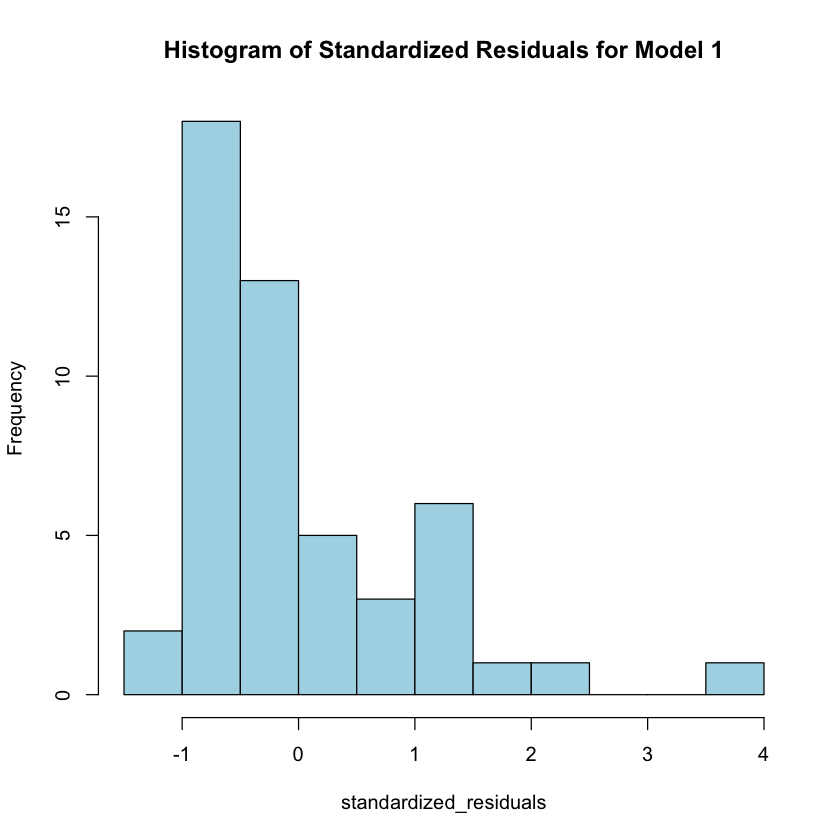

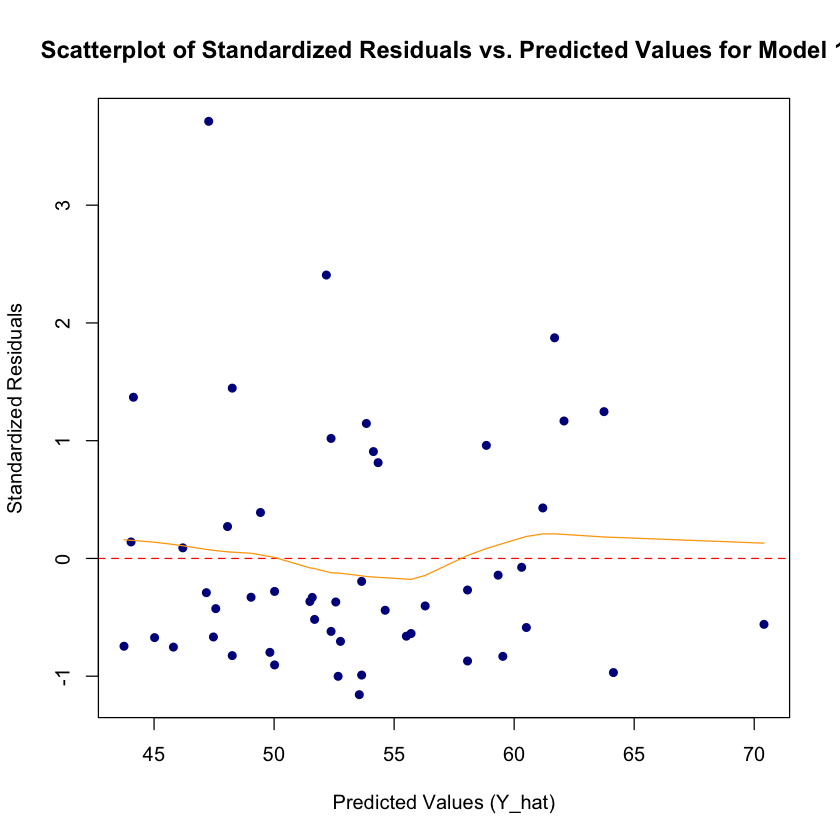

In [4]:
# Calculate the residuals for Model 1
residuals_model1 <- df$HouseholdIncome - predict(model1)

# Standardize the residuals
standardized_residuals <- residuals_model1 / sd(residuals_model1)

# Plot histogram of standardized residuals
hist(standardized_residuals, breaks = 10, col = "lightblue",
     main = "Histogram of Standardized Residuals for Model 1")

# Plot scatterplot of standardized residuals against predicted values
plot(predict(model1), standardized_residuals, pch = 16, col = "darkblue",
     xlab = "Predicted Values (Y_hat)", ylab = "Standardized Residuals",
     main = "Scatterplot of Standardized Residuals vs. Predicted Values for Model 1")

# Add a horizontal line at y = 0
abline(h = 0, col = "red", lty = 2)

# Add a lowess smoother to the scatterplot
lowess_line <- lowess(predict(model1), standardized_residuals, f = 2 / 3, iter = 0)
lines(lowess_line, col = "orange")


## In the histogram of standardized residuals for Model 1, it shows that the distribution is approximately bell-shaped with a mean of 0 and a standard deviation of 1. The skewness of 1.539 indicates a mid- positive skew, meaning the residuals are slightly skewed to the right. The kurtosis value of 2.461 shows that the distribution has slightly denser tails.

## In the scatterplot of standardized residuals vs. predicted values for Model 1, we can see that there is no linear relationship between the standardized residuals and the predicted values. The correlation value of 0 proves this.

## Overall, these graphs provide insights into the distribution and relationship of the standardized residuals in Model 1. The histogram gives us an idea about the normality of the residuals, while the scatterplot helps show the linearity and patterns in the residuals.

# Task 9

In [5]:
model2 <- lm(HouseholdIncome ~ HighSchool, data = df)
summary(model2)
prediction <- predict(model2, df)
residuals <- df$HouseholdIncome - prediction
sse <- sum(residuals^2)
mean_Y <- mean(df$HouseholdIncome)
deviations_Y <- df$HouseholdIncome - mean_Y
sst <- sum((df$HouseholdIncome - mean_Y)^2)
ssr <- sum((prediction - mean_Y)^2)
r_squared <- ssr / sst
cat("Sum of squared residuals (SSE):", sse, "\n")
cat("Sum of squares total (SST):", sst, "\n")
cat("Sum of squares due to regression (SSR):", ssr, "\n")
cat("R-squared:", r_squared, "\n")


Call:
lm(formula = HouseholdIncome ~ HighSchool, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.302  -5.647  -2.430   5.687  20.037 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -54.3476    32.5588  -1.669  0.10159   
HighSchool    1.2050     0.3643   3.308  0.00179 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.924 on 48 degrees of freedom
Multiple R-squared:  0.1856,	Adjusted R-squared:  0.1687 
F-statistic: 10.94 on 1 and 48 DF,  p-value: 0.001788


Sum of squared residuals (SSE): 3013.577 
Sum of squares total (SST): 3700.488 
Sum of squares due to regression (SSR): 686.9114 
R-squared: 0.1856272 


## <strong>The analysis of Model 2 is below:</strong>

### <b>Coefficients:</b>
The intercept coefficient is -54.3476, indicating that when the HighSchool value is zero, the estimated HouseholdIncome is -54.35. However, this coefficient is not statistically significant at the conventional significance level (p-value: 0.10159).<br>

#### The coefficient for HighSchool is 1.2050, indicating that for a one-unit increase in HighSchool, the estimated HouseholdIncome increases by 1.2050. This coefficient is somewhaat significant (p-value: 0.00179).

### <b>R-squared and Adjusted R-squared:</b>
The R-squared is 0.1856. This means that about 18.56 % of the variability in HouseholdIncome can be explained by HighSchool.<br>
The adj. R-squared value is 0.1687, which take into account the number of predictors and degrees of freedom.<br>

### <b>F-statistic and p-value:</b>
The F-statistic is 10.94 with a p-value of 0.001788. This indicates that there is evidence of a significant relationship between the HighSchool variable and HouseholdIncome.<br>

### Comparison of Model 1 and Model 2:

The R-squared of model 1 is higher compared to Model 2.<br>

####  Considering the higher R-squared value and the significance of the coefficients in Model 1, we can conclude that Model 1 is a better model for predicting HouseholdIncome compared to Model 2.

# Task 10

In [6]:
model3 <- lm(HouseholdIncome ~ Insured, data = df)
summary(model3)
prediction <- predict(model3, df)
residuals <- df$HouseholdIncome - prediction
sse <- sum(residuals^2)
mean_Y <- mean(df$HouseholdIncome)
deviations_Y <- df$HouseholdIncome - mean_Y
sst <- sum((df$HouseholdIncome - mean_Y)^2)
ssr <- sum((prediction - mean_Y)^2)
r_squared <- ssr / sst
cat("Sum of squared residuals (SSE):", sse, "\n")
cat("Sum of squares total (SST):", sst, "\n")
cat("Sum of squares due to regression (SSR):", ssr, "\n")
cat("R-squared:", r_squared, "\n")



Call:
lm(formula = HouseholdIncome ~ Insured, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-8.896 -5.963 -1.976  5.200 17.865 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.4004    15.3210  -1.070     0.29    
Insured       0.8695     0.1907   4.559 3.56e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.335 on 48 degrees of freedom
Multiple R-squared:  0.3021,	Adjusted R-squared:  0.2876 
F-statistic: 20.78 on 1 and 48 DF,  p-value: 3.557e-05


Sum of squared residuals (SSE): 2582.398 
Sum of squares total (SST): 3700.488 
Sum of squares due to regression (SSR): 1118.09 
R-squared: 0.3021466 


## Model 3 Analysis:

### Interpretation of Coefficients:
The y-intercept coefficient is -16.4004 so if the Insured value were to be zero the estimate for the HouseholdIncome would be -16.4004. However, with a p-value of 0.29 this coefficient is not significant.<br>
The coefficient for the Insured variable is 0.8695. This signifies that with each unit increase in Insured, we can expect an estimated increase of 0.8695 in the HouseholdIncome, a relationship that is statistically significant.

### R-squared and Adjusted R-squared Interpretation:
The R-squared value of 0.3021 reveals that roughly 30.21% of the variations in HouseholdIncome can be accounted for by the Insured variable. As for the adjusted R-squared value for Insured, it comes to 0.2876. <br>

### Interpreting the F-statistic and p-value:
With an F-statistic of 20.78, we have significant evidence of a meaningful correlation between the Insured variable and HouseholdIncome.

### Model Comparison:
Comparing Model 3 with both Model 1 and Model 2, Model 3's r-squared value of 0.3021 performs worse when compared to Model 1 with an r-squared value of 0.47 but has a higher r-squared  Model 2 with 0.1856.

### Based on all the information above, the first model that was trained on education is the best predictor for income.